In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import librosa
%matplotlib inline

import IPython.display as ipd
from scipy import signal, linalg   #use scipy.signal.hilbert to create an envelope of the audio signal
from scipy.signal import hilbert, chirp
from scipy.io import wavfile

import glob
import os

import wave

from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

# Project Title #
## course name, year ##

Written by Tony Shara, Adi Ganapathi, Dohyun Cheon ,  Larry Yan ,   Richard Shuai

anthony.shara@berkeley.edu, avganapathi@berkeley.edu,        ...,      ...,      ...

### Table of contents ###
* [Introduction](#introduction)
    
    Fourier Features
* [Part 0: What are fourier features?](#part0)
    
    Voice Recognition
* [Part 1: Collecting Data and preprocessing](#part1)
* [Part 2: Learning time features](#part2)
    - [PCA](#part2a)
    - [K Means Clustering](#part2b)
    - [Testing Classifiers](#part2c)
* [Part 3: Learning Fourier features](#part3)
    - [PCA](#part3a)
    - [K Means Clustering](#part3b)
    - [Testing Classifiers](#part3c)
* [Part nn: Classification with neural nets](#nn)
* [Part 4: Compare classification with time and fourier features](#conclusion)
    

<a id="introduction"></a>
# Introduction #
Adi (Sahai-like first sentence lol): This lab will give you a new perspective on your data through the lens of the frequency domain by means of the Fourier Transform. You will learn the power of using the frequency domain as an intermediate representation for downstream applications such as classification of raw audio signals.

This lab will introduce students to the idea of learning about data by looking at the fourier transform of their data.  The fourier transform is a useful mathematical tool that takes a signal and breaks it down into it's independent frequencies.  This allows us to learn about data by looking at the strength of each frequency that is contribiuted to the data point.  This means that fourier transforms can be especially useful when leanring about data that can classified by it's frequency (e.g. audio, images, etc).  In this lab, we are particularly interested in audio signal.

Before we can talk about fourier tranforms of audio signal, it is useful to understand how the audio signal is collected.  Everythin in the real world happens continuously, however, computers need to look at data in discrete steps.  This soultion to this is [the shannon nyquist sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem).

### Goals ###
The goal of this lab is to explore the use

<a id="part0"></a>
# Part 0: Fourier Features in audio signal #


A raw audio signal can look like a mess, and indeed it it.  This is because the audio signal is a complex signal composed of a linear combination of cosines, each of which can have a unique ammplitude and frequency. 

A plot of raw audio data simply tells us about the amplitude of an audio signal at a single sample in time

### What new information do we learn by encoding with DFT? ###

### Encoding audio with DFT ###
                   
                                   ## talk about encodind with DFT ##

                                     ## Insert DFT formula here ##
                                     
              ## talk about what the DFT formula is doing and how it relates to frequencies of the audio file ##
              

### Why is this important? ###

### Quiz Question 1:  How can we use DFT to learn about hidden features in an audio sample? ####

### Working with audio files ###

Q1: 
Play the audio file below.  Does anything stand out about pitch of the most pronounced sound as the file plays?  How might we be able to use the DFT to learn about these features?

# Fourier Transforms of waves #

When looking at waves, what are some important characteristics of these waves that make them stand out? To answer this question, lets break down the different components of a wave.

<br><br>
<img src="visuals/wave_visual.gif" alt="Drawing" style="width: 50em;"/>

### amplitude ###
* What is the amplitude of a wave
* What does the amplitude at a given time tell us

### wavelength / frequency ###
* What is the wavelength of a wave
* What is the frequency of a wave
* how are the wavelength and frequency of a wave important
* What new imformation can we gain by looking at the frequency of the wave
* How can we look at our frequencies? FFT!

## Frequency Spectrum ##

When talking about signals in the frequency domain, it is useful to look at the frequency spectrum of the signal.  The frequency spectrum is simply a plot of the magnitude of the fourier transform of the signal over a spectrum of frequencies.  Since the fourier transform of a signal is symmetric about the y axis, we only care to look at positive frequencies.

## Simple Signals ##

As we discussed above, it can be useful to talk about a signal in terms of the energy of its constituant frequencies rather than the amplitude over time.  Lets look at the most simple example of a signal.  Run through the cells below to visualize the frequency respons over time

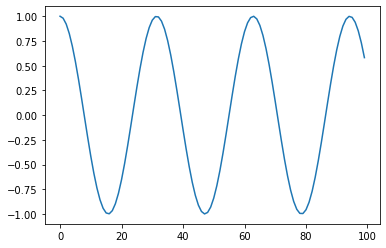

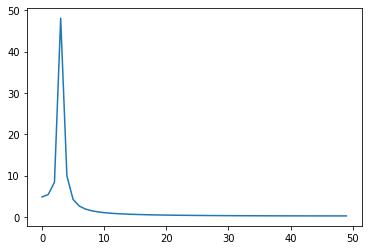

In [91]:
sig = np.cos(np.arange(0, 20, 0.2))
plt.plot(sig)
plt.show()

fft = np.fft.fft(sig)[:50]
fft = np.abs(fft)
plt.plot(fft)
plt.show()

#The frequency response is symmetric about the y axis, so we really only care to look at positive frequencies (w > 0)

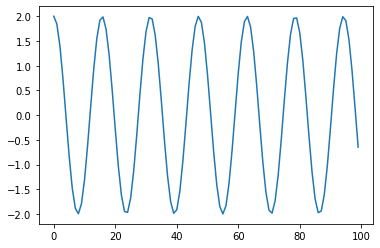

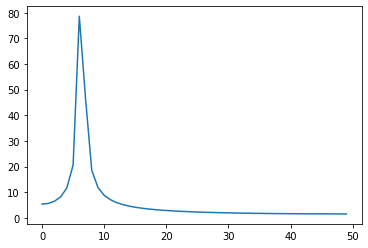

In [92]:
sig = 2*np.cos(np.arange(0, 20, 0.2)*2)
plt.plot(sig)
plt.show()

fft = np.fft.fft(sig)[:50]
fft = np.abs(fft)
plt.plot(fft)
plt.show()

## Complex Signals ##


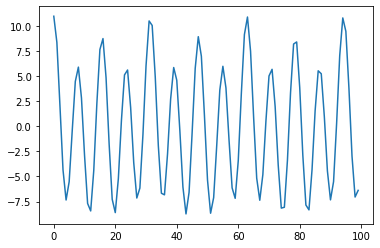

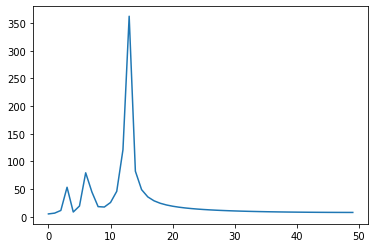

In [93]:
cos1 = np.cos(np.arange(0, 20, 0.2))
cos2 = 2*np.cos(np.arange(0, 20, 0.2)*2)
cos3 = 8*np.cos(np.arange(0, 20, 0.2)*4)
sig = cos1 + cos2 + cos3
plt.plot(sig)
plt.show()

#fourier transform of a complex signal
fft = np.fft.fft(sig)[:50]
fft = np.abs(fft)
plt.plot(fft)
plt.show()

Notice above that in our signal, we have 3 different distinct cosines contributing to the signal. Is this obvious when looking at the fourier transform of the comlex signal?  Explain.

<span style="color:blue">**A**: (TODO) </span>

## Fourier Series ##

A complex signal can be messy and hard to understand by simply looking at it, however, if we could break down the signal into many simpler signals, we might be able to learn a bit more about the more complex signal.  It turns out that this is in fact true!  We can express any wave as a linear combination of sines and cosines.  This mathematical expression is called the <b>Fourier Series</b>.

            $$ X[k] = \sum_{n = 0}^{N-1} x(n) e^{-i\frac{2\pi}{N}nk} $$

As we saw from above, each cosine contributed some energy to a frequency coresponding to the frequency of the wave!  This means that 

## Sound Waves ##



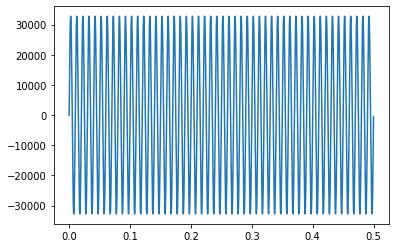

In [94]:
hz100 = "test-tones/100hz.wav"

fs, data = wavfile.read(hz100)

t = np.arange(0,data.shape[0]/fs, 1/fs)

plt.plot(t, data)
plt.show()

ipd.Audio("test-tones/100hz.wav")


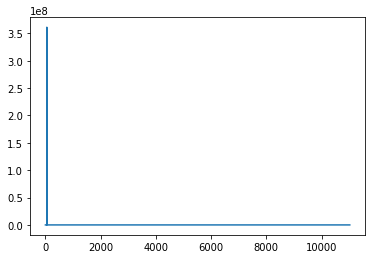

In [95]:
F = np.fft.fft(data)

#magnitude spectrum
plt.plot(np.abs(F[:11025]))
plt.show()

## Complex Sound Wave ##

In [96]:
ipd.Audio("SpiritInTheSky.wav")

Encode SpiritInTheSky.wav with DFT and plot the frequency response of the signal.  Then compare it to the plot of the original signal of SpiritInTheSky.wav without DFT encoding. (Hint: np.fft.fft might be usefull)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


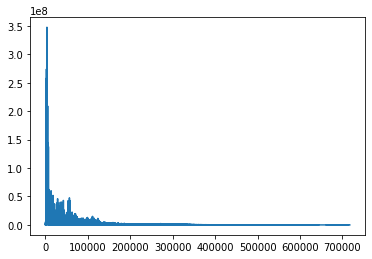

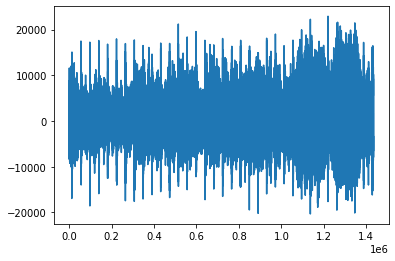

In [97]:
# fs is the sampling rate of the wav file in frames per second
# data is the audio sample
fs, data = wavfile.read("SpiritInTheSky.wav")
data = data[:,0]

# TODO: Encode SpiritInTheSky.wav with DFT and plot the frequency response of the signal
F = np.fft.fft(data)
F = F[:int(F.shape[0]/2)]      #only look at first half of data since it is symmetric
F = np.abs(F)
plt.plot(F)
# plt.magnitude_spectrum(data, Fs=fs)
plt.show()

plt.plot(data)
plt.show()


# Voice Recognition #

In the previous part we looked at audio files with and without DFT encodings and saw that the DFT encoding allows you to learn about the energy of different frequencies throughout the sound.  Now that we have a way to look at the different frequencies in some sampled sound, lets try to train a machine learning model that will learn about the frequencies in a person's voice!

(Adi: This obviously needs to change based on our pivot to voice digit classification)
In this part, we will use K means clustering to recognize a specific person just using their voice.  Your job is to create a password protection system that will determining if the client is saying the word "open" and only unlock for them.  

We will first create a model to learn to classify a person's voice by looking at the amplitude of the audio file over time. Then we will encode the audio file using DFT and classify a person's voice by looking at the frequencies of their voice as they say different words.

<a id="part1"></a>
# Part 1: Collecting Data and Preprocessing #


Now we have collected our data, where each datapoint is in the form of a .wav file, we can construct our data matrix.  To do this, we first need to get each .wav file into a usable format.  For this, we will use wavfile.read to store each data point in a numpy array.  Next, we will contruct our data matrix using each of our data points.

#### NOTE: maybe move this section down into part 2

# Enveloping data for time domain clustering

What is the motivation behind enveloping our time domainsignal?  Why can't we do PCA on the unprocessed signal?

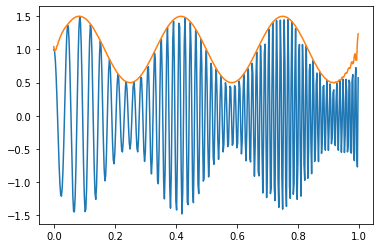

In [98]:
# here is an example of enveloping
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t))

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

plt.plot(t, signal, label='signal')
plt.plot(t, amplitude_envelope, label='envelope')
plt.show()

# Get Snippets

In [81]:
#DO WE NEED THIS?

def get_snippets(data, length, pre_length, thres):
    data_out = np.zeros((np.shape(data)[0], length))
    
    for rnum, row in enumerate(data):
        # Find the threshold
        row_thres = thres*np.max(row)

        # Figure out when interesting snippet starts
        block = pre_length
        while (row[block] < row_thres):
            block = block + 1
        block = min(block, 172 - length)
        data_out[rnum,:] = row[block-pre_length:block-pre_length+length]
        
        # Normalization
        data_out[rnum,:] = data_out[rnum,:] / np.sum(data_out[rnum,:])
        
    return data_out

In [82]:
#DO WE NEED THIS?

##########################
## Probably need this for
## time domain clustering
#########################


length = 100 # Default: 80        # Adjust this
pre_length = 5 # Default: 5     # Adjust this
threshold = 0.6 # Default:  0.5    # Adjust this

zero_processed_train = get_snippets(zero_train, length, pre_length, threshold)
one_processed_train = get_snippets(one_train, length, pre_length, threshold)
two_processed_train = get_snippets(two_train, length, pre_length, threshold)
three_processed_train = get_snippets(three_train, length, pre_length, threshold)
four_processed_train = get_snippets(four_train, length, pre_length, threshold)
five_processed_train = get_snippets(five_train, length, pre_length, threshold)
six_processed_train = get_snippets(six_train, length, pre_length, threshold)
seven_processed_train = get_snippets(seven_train, length, pre_length, threshold)
eight_processed_train = get_snippets(eight_train, length, pre_length, threshold)
nine_processed_train = get_snippets(nine_train, length, pre_length, threshold)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Look at the sampled data from our data matrix by plotting the data over time

Do fft and look at the frequencies



In [51]:
#DO WE NEED THIS?

fourier_data = np.fft.fft(data_matrix)
fourier_data = fourier_data[:,0:5000]
fourier_data = np.abs(fourier_data)

# plt.plot(fourier_data)
# plt.show()

# w = np.arange(-fs/2, fs/2)

# print(fourier_data.shape)
# print(data_matrix.shape)
# print(data_matrix.shape)

# fft = np.fft.fft(data_matrix[0])
# fft = np.abs(fft)
# plt.plot(fft)
# plt.show()

<a id="part2"></a>
# Part 2:  Learning a Classifier #


Before we get started, let's look at a few of our labels.  Each label in our dataset represents a unique number between 0 and 9.  We will use this data to recognize a unique word, in this case, a number.

In [99]:
#Before beginning PCA, we need to process our data by enveloping it.  WHAT IS AN ENVELOPE

DATA_DIR = "recordings/"

X = []
y = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
for fname in os.listdir(DATA_DIR):
    struct = fname.split('_')
    digit = struct[0]
    wav, sr = librosa.load(DATA_DIR + fname)
    padded = pad(wav, 30000)
    X.append(padded)
    y.append(digit)
X = np.vstack(X)
y = np.array(y)

# processed_X = []
# for i in range(X.shape[0]):
#     temp = hilbert(X[i])
#     temp = np.abs(analytic_signal)
#     processed_X.append(temp)
# processed_X = np.vstack(processed_X)
    
print('X:', X.shape)
print('y:', y.shape)

X: (3000, 30000)
y: (3000,)


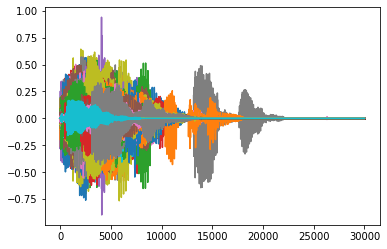

In [110]:
################################
## Dataset of only 2 and 7
################################

X_small = []
for i in range(len(y)):
    if y[i] == '2' or y[i] == '7':
        X_small.append(X[i])
X_small = np.vstack(X_small)

X = X_small

plt.plot(X.T)
plt.show()

In [111]:
#TODO: Describe what is going on in this cell

hilberts = []

for i in range(X.shape[0]):
    analytic_signal = hilbert(X[i])
    amplitude_envelope = np.abs(analytic_signal)
    hilberts.append(amplitude_envelope)
hilberts = np.vstack(hilberts)
processed_X = hilberts[:,:8000]

print(processed_X.shape)

(600, 8000)


<a id="part2a"></a>
### Part 2a: PCA in the Time Domain ###

        # motivation behind this method here and why it's a natural first approach

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


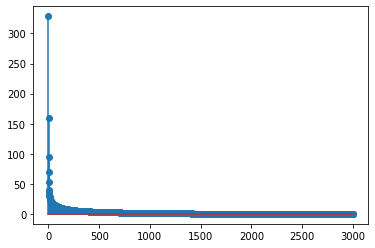

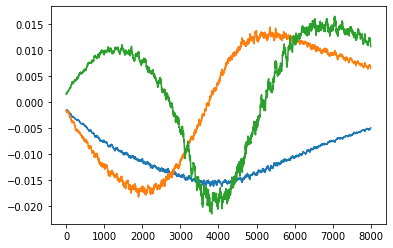

In [86]:
# Performing SVD

U,S,Vt = np.linalg.svd(processed_X)

plt.stem(S)
plt.show()

#selecting principle components (can chose variable number of principle components, but have chosen 3 for now)
new_basis = np.array([Vt[0], Vt[1], Vt[2]]).T        
plt.plot(new_basis)

# Project the data onto the new basis
proj = np.dot(processed_X, new_basis)


<a id="part2b"></a>
### Part 2b: K Means Clustering ###
    # 

(3000, 3)
(3000,)


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

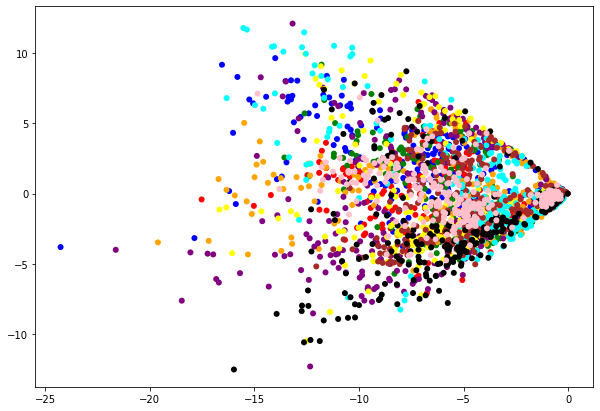

In [89]:
############################
##         K Means
############################


# Here we visual our clusters by colording by label

print(proj.shape)
print(y.shape)
zeros = []
ones = []
twos = []
threes = []
fours = []
fives = []
sixes = []
sevens = []
eights = []
nines = []


for i in range(len(y)):
    if y[i] == '0':
        zeros.append(proj[i])
    if y[i] == '1':
        ones.append(proj[i])
    if y[i] == '2':
        twos.append(proj[i])
    if y[i] == '3':
        threes.append(proj[i])
    if y[i] == '4':
        fours.append(proj[i])
    if y[i] == '5':
        fives.append(proj[i])
    if y[i] == '6':
        sixes.append(proj[i])
    if y[i] == '7':
        sevens.append(proj[i])
    if y[i] == '8':
        eights.append(proj[i])
    if y[i] == '9':
        nines.append(proj[i])
        
zeros = np.vstack(zeros)
ones = np.vstack(ones)
twos = np.vstack(twos)
threes = np.vstack(threes)
fours = np.vstack(fours)
fives = np.vstack(fives)
sixes = np.vstack(sixes)
sevens = np.vstack(sevens)
eights = np.vstack(eights)
nines = np.vstack(nines)
        
    
    
fig=plt.figure(figsize=(10,7))
plt.scatter(zeros[:,0], zeros[:,1], c=['blue'], edgecolor='none')
plt.scatter
plt.scatter(ones[:,0], ones[:,1], c=['red'], edgecolor='none')
plt.scatter
plt.scatter(twos[:,0], twos[:,1], c=['green'], edgecolor='none')
plt.scatter
plt.scatter(threes[:,0], threes[:,1], c=['orange'], edgecolor='none')
plt.scatter
plt.scatter(fours[:,0], fours[:,1], c=['purple'], edgecolor='none')
plt.scatter
plt.scatter(fives[:,0], fives[:,1], c=['yellow'], edgecolor='none')
plt.scatter
plt.scatter(sixes[:,0], sixes[:,1], c=['cyan'], edgecolor='none')
plt.scatter
plt.scatter(sevens[:,0], sevens[:,1], c=['brown'], edgecolor='none')
plt.scatter
plt.scatter(eights[:,0], eights[:,1], c=['black'], edgecolor='none')
plt.scatter
plt.scatter(nines[:,0], nines[:,1], c=['pink'], edgecolor='none')
plt.scatter

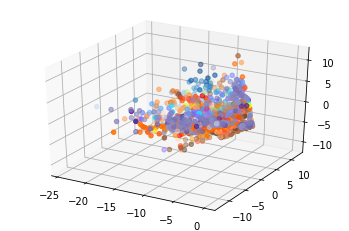

In [103]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(zeros[:,0], zeros[:,1], zeros[:,2], c=zeros[:,2], cmap='Blues');
ax.scatter3D(ones[:,0], ones[:,1], ones[:,2], c=twos[:,2], cmap='Reds');
ax.scatter3D(twos[:,0], twos[:,1], twos[:,2], c=threes[:,2], cmap='Greens');
ax.scatter3D(threes[:,0], threes[:,1], threes[:,2], c=fours[:,2], cmap='Oranges');
ax.scatter3D(fours[:,0], fours[:,1], fours[:,2], c=fives[:,2], cmap='Purples');
ax.scatter3D(fives[:,0], fives[:,1], fives[:,2], c=sixes[:,2], cmap='cool');
ax.scatter3D(sixes[:,0], sixes[:,1], sixes[:,2], c=sevens[:,2], cmap='copper');
ax.scatter3D(sevens[:,0], sevens[:,1], sevens[:,2], c=eights[:,2], cmap='PuBu');
ax.scatter3D(eights[:,0], eights[:,1], eights[:,2], c=nines[:,2], cmap='autumn');
ax.scatter3D(nines[:,0], nines[:,1], nines[:,2], c=nines[:,2], cmap='jet');


<a id="part2c"></a>
### Part 2c: Testing Classifiers ###


<a id="part3"></a>
# Part 3: Learning Fourier Features #


# Using FFT

In [100]:
##########################################
## ARE WE STILL DOING REGULAR DFT ON X
## OR ARE WE ONLY DOING STFT TO ENCODE
## OUR ADUIO WITH DFT
#########################################



# RUN EITHER 1 OR 2 BELOW
#     Is there a difference?


# 1. Performing fft on each row of A
# fft_A = []
# for i in range(A.shape[0]):
#     fA = np.fft.fft(A[i])               #take fft of each row
#     fft_A.append(fA)                    #add fft to next row in fft_A
# data_matrix = np.vstack(stft_A)


# 2. perform matrix fft on A
print(X.shape)
fft_A = np.fft.fft(X)                     #take fft of data matrix (two and seven)
fft_A = fft_A[:,:int(fft_A.shape[1]/2)]   # first half of frequeny response since symmetric
fft_A = np.abs(fft_A)

# plt.plot(fft_A[0])
# plt.show()

# Since certain frequencies about a certain threshold have a zero or near-zero presence in the frequency response,
# we can simply cut them off or get rid of them. This will allow us to perform PCA on a smaller matrix which will 
# save us a lot of time and prevent dead kernels.

fft_A = fft_A[:,:6000]

# plt.plot(fft_A[0])
# plt.show()

(3000, 30000)


# PCA

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


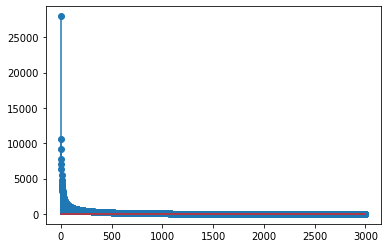

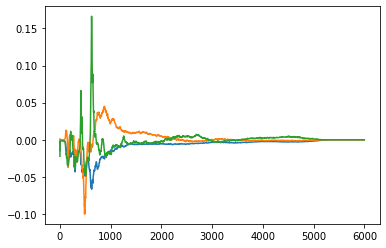

In [101]:
U, S, Vt = np.linalg.svd(fft_A)

plt.stem(S)
plt.show()

new_basis = np.array([Vt[0], Vt[1], Vt[2]]).T        # This should be the basis containing your principal components

plt.plot(new_basis)
plt.show()

proj = np.dot(fft_A, new_basis)


# K Means

(3000, 3)
(3000,)


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

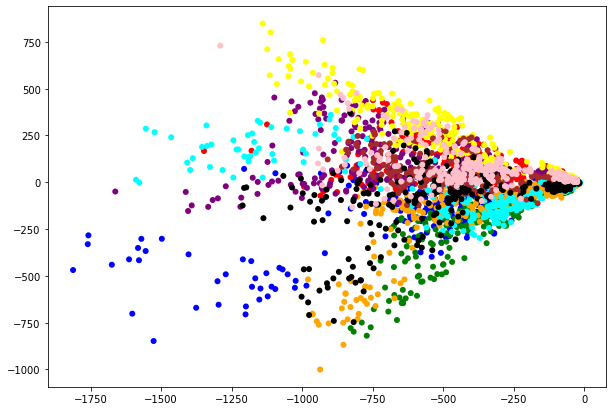

In [102]:
############################
##         K Means
############################

print(proj.shape)
print(y.shape)
zeros = []
ones = []
twos = []
threes = []
fours = []
fives = []
sixes = []
sevens = []
eights = []
nines = []


for i in range(len(y)):
    if y[i] == '0':
        zeros.append(proj[i])
    if y[i] == '1':
        ones.append(proj[i])
    if y[i] == '2':
        twos.append(proj[i])
    if y[i] == '3':
        threes.append(proj[i])
    if y[i] == '4':
        fours.append(proj[i])
    if y[i] == '5':
        fives.append(proj[i])
    if y[i] == '6':
        sixes.append(proj[i])
    if y[i] == '7':
        sevens.append(proj[i])
    if y[i] == '8':
        eights.append(proj[i])
    if y[i] == '9':
        nines.append(proj[i])
        
zeros = np.vstack(zeros)
ones = np.vstack(ones)
twos = np.vstack(twos)
threes = np.vstack(threes)
fours = np.vstack(fours)
fives = np.vstack(fives)
sixes = np.vstack(sixes)
sevens = np.vstack(sevens)
eights = np.vstack(eights)
nines = np.vstack(nines)
        
    
    
fig=plt.figure(figsize=(10,7))
plt.scatter(zeros[:,0], zeros[:,1], c=['blue'], edgecolor='none')
plt.scatter
plt.scatter(ones[:,0], ones[:,1], c=['red'], edgecolor='none')
plt.scatter
plt.scatter(twos[:,0], twos[:,1], c=['green'], edgecolor='none')
plt.scatter
plt.scatter(threes[:,0], threes[:,1], c=['orange'], edgecolor='none')
plt.scatter
plt.scatter(fours[:,0], fours[:,1], c=['purple'], edgecolor='none')
plt.scatter
plt.scatter(fives[:,0], fives[:,1], c=['yellow'], edgecolor='none')
plt.scatter
plt.scatter(sixes[:,0], sixes[:,1], c=['cyan'], edgecolor='none')
plt.scatter
plt.scatter(sevens[:,0], sevens[:,1], c=['brown'], edgecolor='none')
plt.scatter
plt.scatter(eights[:,0], eights[:,1], c=['black'], edgecolor='none')
plt.scatter
plt.scatter(nines[:,0], nines[:,1], c=['pink'], edgecolor='none')
plt.scatter

# Using STFT to Encode Signal with DFT

STFt breaks the signal down in the time domain into smaller windows and then performs DFT on each of the smaller windows

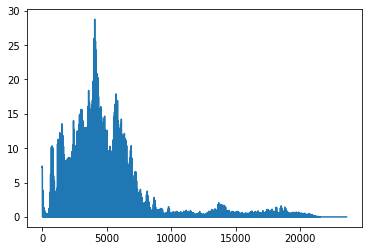

In [103]:
###########################
##         STFT
##########################

stft = []
for i in range(X.shape[0]):
    temp = np.abs(librosa.stft(X[i]))
    temp = temp[:400,:]
    temp = temp.flatten()
    stft.append(temp)
    
stft = np.vstack(stft)

plt.plot(stft[0])
plt.show()

#Maybe try enveloping this signal??


<a id="part3a"></a>
### Part 3a: PCA ###


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


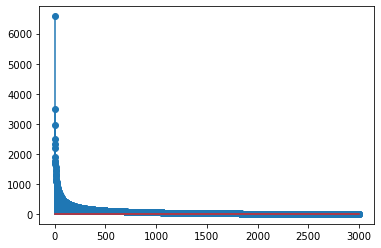

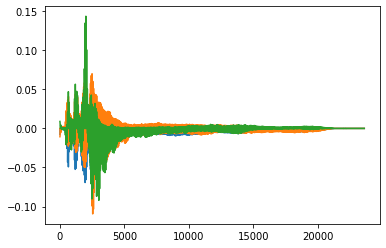

In [104]:
############################
##          PCA
############################

U,S,Vt = np.linalg.svd(stft)
plt.stem(S)
plt.show()

new_basis = np.array([Vt[0], Vt[1], Vt[2]]).T        # This should be the basis containing your principal components
plt.plot(new_basis)
plt.show()

proj = np.dot(stft, new_basis)


# import librosa.display
# wav, fs = librosa.load(files[0])
# print(wav.shape)
# print(data_matrix[0].shape)
# D = librosa.amplitude_to_db(np.abs(librosa.stft(A[0,:])), ref=np.max)
# # plt.plot(D)
# # plt.show()
# # print(D.shape)
# librosa.display.specshow(D, y_axis='linear')

<a id="part3b"></a>
### Part 3b: Kmeans Clustering ###


(3000, 3)
(3000,)


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

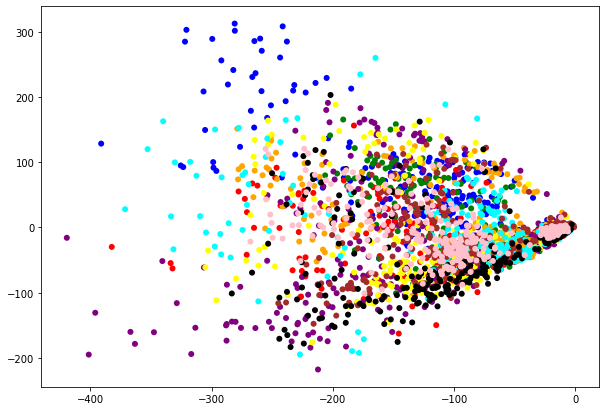

In [105]:
############################
##         K Means
############################

print(proj.shape)
print(y.shape)

zeros = []
ones = []
twos = []
threes = []
fours = []
fives = []
sixes = []
sevens = []
eights = []
nines = []


for i in range(len(y)):
    if y[i] == '0':
        zeros.append(proj[i])
    if y[i] == '1':
        ones.append(proj[i])
    if y[i] == '2':
        twos.append(proj[i])
    if y[i] == '3':
        threes.append(proj[i])
    if y[i] == '4':
        fours.append(proj[i])
    if y[i] == '5':
        fives.append(proj[i])
    if y[i] == '6':
        sixes.append(proj[i])
    if y[i] == '7':
        sevens.append(proj[i])
    if y[i] == '8':
        eights.append(proj[i])
    if y[i] == '9':
        nines.append(proj[i])
        
zeros = np.vstack(zeros)
ones = np.vstack(ones)
twos = np.vstack(twos)
threes = np.vstack(threes)
fours = np.vstack(fours)
fives = np.vstack(fives)
sixes = np.vstack(sixes)
sevens = np.vstack(sevens)
eights = np.vstack(eights)
nines = np.vstack(nines)
        
    
    
fig=plt.figure(figsize=(10,7))
plt.scatter(zeros[:,0], zeros[:,1], c=['blue'], edgecolor='none')
plt.scatter
plt.scatter(ones[:,0], ones[:,1], c=['red'], edgecolor='none')
plt.scatter
plt.scatter(twos[:,0], twos[:,1], c=['green'], edgecolor='none')
plt.scatter
plt.scatter(threes[:,0], threes[:,1], c=['orange'], edgecolor='none')
plt.scatter
plt.scatter(fours[:,0], fours[:,1], c=['purple'], edgecolor='none')
plt.scatter
plt.scatter(fives[:,0], fives[:,1], c=['yellow'], edgecolor='none')
plt.scatter
plt.scatter(sixes[:,0], sixes[:,1], c=['cyan'], edgecolor='none')
plt.scatter
plt.scatter(sevens[:,0], sevens[:,1], c=['brown'], edgecolor='none')
plt.scatter
plt.scatter(eights[:,0], eights[:,1], c=['black'], edgecolor='none')
plt.scatter
plt.scatter(nines[:,0], nines[:,1], c=['pink'], edgecolor='none')
plt.scatter

<a id="part3c"></a>
### Part 3c: Testing Classifiers ###


<a id="nn"></a>
# Part NN: Classification of Audio Signals with Neural Nets

Now that we have attempted to classify audio signals using traditional clustering methads, lets try using a neural network instead.  For this, we will use [Keras](https://keras.io/)

In [2]:

DATA_DIR = "recordings/"

#Feel free to change the test speaker for each round of training/testing so that we can perform k-fold validation
test_speaker = 'theo' 
train_X = []
train_spectrograms = []

train_y = []

test_X = []
test_spectrograms = []

test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))

for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram,40)

        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise

train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)

train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_y = to_categorical(np.array(test_y))


print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_y:', train_y.shape)
print
print('test_X:', test_X.shape)
print('test_spectrograms:', test_spectrograms.shape)
print('test_y:', test_y.shape)

train_X: (2500, 30000)
train_spectrograms: (2500, 1025, 40)
train_y: (2500, 10)
test_X: (500, 30000)
test_spectrograms: (500, 1025, 40)
test_y: (500, 10)


# NN in time domain

In [3]:
ip = Input(shape=(train_X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(10, activation='softmax')(hidden)
#model = Model(input=ip, output=op)
model = Model(ip, op)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30000)]           0         
_________________________________________________________________
dense (Dense)                (None, 128)               3840128   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,841,418
Trainable params: 3,841,418
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X,
          train_y,
          epochs=10,
          batch_size=32,
          validation_data=(test_X, test_y))

Epoch 1/10
79/79 [==============================] - 1s 16ms/step - loss: 2.3022 - accuracy: 0.1688 - val_loss: 2.2932 - val_accuracy: 0.1420
Epoch 2/10
79/79 [==============================] - 1s 14ms/step - loss: 1.6636 - accuracy: 0.5560 - val_loss: 2.2979 - val_accuracy: 0.1640
Epoch 3/10
79/79 [==============================] - 1s 15ms/step - loss: 1.2230 - accuracy: 0.6896 - val_loss: 2.3052 - val_accuracy: 0.1560
Epoch 4/10
79/79 [==============================] - 1s 15ms/step - loss: 0.9104 - accuracy: 0.7812 - val_loss: 2.3225 - val_accuracy: 0.1580
Epoch 5/10
79/79 [==============================] - 1s 15ms/step - loss: 0.7053 - accuracy: 0.8404 - val_loss: 2.3444 - val_accuracy: 0.1540
Epoch 6/10
79/79 [==============================] - 1s 15ms/step - loss: 0.5756 - accuracy: 0.8720 - val_loss: 2.3558 - val_accuracy: 0.1580
Epoch 7/10
79/79 [==============================] - 1s 14ms/step - loss: 0.4897 - accuracy: 0.8984 - val_loss: 2.3721 - val_accuracy: 0.1600
Epoch 8/10
79

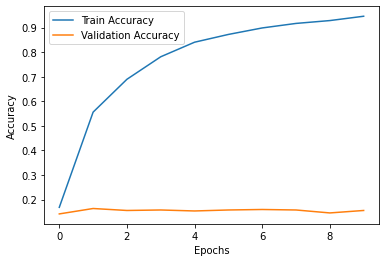

In [5]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# NN in frequency domain with STFT

In [6]:
train_X_ex = np.expand_dims(train_spectrograms, -1)
test_X_ex = np.expand_dims(test_spectrograms, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2500, 1025, 40, 1)
test X shape: (500, 1025, 40, 1)


In [7]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(ip, op)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1025, 40, 1)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1022, 37, 64)      1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 9, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 255, 9, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 146880)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4700192   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_data=(test_X_ex, test_y))

Epoch 1/10
79/79 [==============================] - 34s 437ms/step - loss: 0.1187 - accuracy: 0.9724 - val_loss: 1.6142 - val_accuracy: 0.4860
Epoch 2/10
79/79 [==============================] - 32s 406ms/step - loss: 0.0496 - accuracy: 0.9832 - val_loss: 1.5852 - val_accuracy: 0.4920
Epoch 3/10
79/79 [==============================] - 32s 410ms/step - loss: 0.0388 - accuracy: 0.9912 - val_loss: 2.0722 - val_accuracy: 0.3960
Epoch 4/10
79/79 [==============================] - 32s 408ms/step - loss: 0.1067 - accuracy: 0.9736 - val_loss: 1.9418 - val_accuracy: 0.3740
Epoch 5/10
79/79 [==============================] - 32s 408ms/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 1.4647 - val_accuracy: 0.5520
Epoch 6/10
79/79 [==============================] - 33s 413ms/step - loss: 0.0326 - accuracy: 0.9924 - val_loss: 1.5027 - val_accuracy: 0.5160
Epoch 7/10
79/79 [==============================] - 33s 417ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 1.6209 - val_accuracy: 0.4940

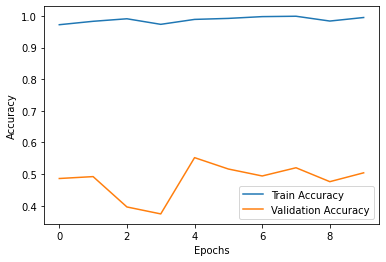

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

<a id="conclusion"></a>
# Part 4: Conclusion #

Now that we have compared different methods of classifying audio signal, let's try to classify numbers using our own voice!

In [106]:
##################################
## Code to collect Audio sample
## from jupyter notebook
#################################

import pyaudio


chunk = 1024                     # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits per sample
channels = 1
fs = 8000                        # Record at 8000 HZ to record at same sampling rate as dataset
seconds = 2                     # Record 2 seconds of audio
filename = "test"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)
    
stream.stop_stream()
stream.close()
p.terminate()

print('Finished recording')


wf = wave.open(filename +".wav", 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()

Recording
Finished recording


In [107]:
ipd.Audio("test.wav")


In [109]:
# wav, sr = librosa.load("recordings/0_george_01.wav")
# print(sr)

# ipd.Audio("tony_test.wav")
# print(test_X.shape)

wav, sr = librosa.load("test.wav")

pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))
spectogram = np.abs(librosa.stft(wav))
padded_spectogram = pad2d(spectogram, 40)
# print(padded_spectogram.shape)
temp = test_X_ex[0]

test_spectograms = np.array(padded_spectogram)
test_spectograms = np.expand_dims(test_spectograms, -1)
test_spectograms = test_spectograms[np.newaxis, :, :]
# print(test_X_ex.shape)
prediction = model.predict(test_spectograms)
print(prediction)

[[3.1412642e-06 1.2374990e-06 4.9564523e-14 4.8304810e-06 8.5071865e-03
  9.9097800e-01 3.1815660e-05 3.0801716e-04 3.5661740e-14 1.6591056e-04]]
